In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt

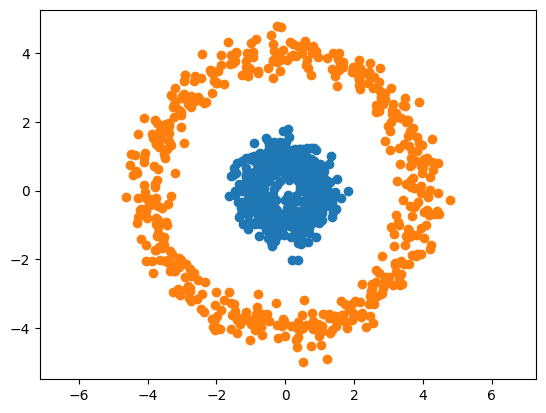

In [7]:
t= torch.linspace(-np.pi, np.pi, 500)
r1=1
x1=r1*torch.sin(t);
y1=r1*torch.cos(t);
D1=torch.empty([500,2])
D1[:,0],D1[:,1]=x1,y1
noise=torch.normal(0.0,0.3,[500,2])
D1=D1+noise
plt.scatter(D1[:,0],D1[:,1])
plt.axis('equal')
r2=4
x2=r2*torch.sin(t);
y2=r2*torch.cos(t);
D2=torch.empty([500,2])
D2[:,0],D2[:,1]=x2,y2
D2=D2+noise
plt.scatter(D2[:,0],D2[:,1])
plt.axis('equal')
X=torch.empty(1000,D1.size(1)+1).fill_(1)
X[::2,:2] = D1
X[1::2,:2] = D2



In [8]:
Y=torch.empty(1000,1)
Y[::2,:2] = 1.0
Y[1::2,:2] = 0.0
W=torch.rand(X.size(1),64)
W2=torch.rand(2,64)
H_inp=torch.empty([64,1])
H_oup=torch.empty([64,1])
print(torch.transpose(W2,0,1)[2])



tensor([0.4254, 0.5610])


In [9]:
def sigmoid(z):
          return 1/(1+np.exp(-z))

In [11]:

for i in range (X.size(0)):
     final_inp=0
     inp_2=torch.empty([64,1])
     H_inp2=torch.empty([64,1])
     H_inp=torch.empty([64,1])
     H_oup=torch.empty([64,1])
     for j in range(64):                                              #initialising dot product with input vector
        H_inp=torch.dot(torch.transpose(W,0,1)[j],X[i])
        H_oup[j]=sigmoid(H_inp)                                       #generating output through activation function
     for k in range(64):
        M=torch.empty([64,2])                                         #initialsing empty torch 
        M[:,0],M[:,1]=H_oup.reshape([64]),1
        inp_2[k]=torch.dot(torch.transpose(W2,0,1)[k],M[k])           #storing dot product values for 2nd layer in inp_2
        final_inp+=inp_2
        print(final_inp)
     final_out=sigmoid(final_inp)                                     #generating output through final output (estimated)
     loss= Y[i]*np.log(final_out)+(1-Y[i])*np.log(1-final_out)        #finding loss
    # print(loss)
     part_grad1=torch.empty(64,1)
     for l in range(64):
        part_grad1[l]=(Y[i]/loss)-((1-Y[i])/(1-loss))*final_inp*(1-final_inp)*M[l][0]           #finding partial derivatives of weights wrt loss
     torch.transpose(W2,0,1)[:,0]=torch.transpose(W2,0,1)[:,0]-0.01*part_grad1.reshape([64])    #updating new weights for 2nd layer
     g=torch.empty(64,3)
     for t in range (64):
        for q in range(3):
           g=torch.empty(64,3)
           g[t][q]=(Y[i]/loss)-((1-Y[i])/(1-loss))*final_inp*(1-final_inp)*W2[1][t]*H_inp[t]*X[q] #generating gradient matrix
     W = W - 0.01*g                                                                              #updating new weights for 1st layer

     
 
     
     

        
     

    

tensor([[ 5.4286e-01],
        [ 3.0618e-41],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 4.9702e-08],
        [ 3.0618e-41],
        [ 9.5488e-09],
        [ 3.0618e-41],
        [-5.9992e+36],
        [ 4.5619e-41],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 1.4013e-45],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 2.2841e-43],
        [ 0.0000e+00],
        [ 1.4013e-45],
        [ 0.0000e+00],
        [ 9.1844e-41],
        [ 1.1551e-40],
        [ 2.2960e-41],
        [ 4.1478e-43],
        [-2.4257e+22],
        [ 8.3809e+24],
        [ 2.9287e-43],
        [ 0

/tmp/ipykernel_32821/1423409355.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
/tmp/ipykernel_32821/3595606488.py:17: RuntimeWarning: divide by zero encountered in log
  loss= Y[i]*np.log(final_out)+(1-Y[i])*np.log(1-final_out)


RuntimeError: expand(torch.FloatTensor{[64, 1]}, size=[1]): the number of sizes provided (1) must be greater or equal to the number of dimensions in the tensor (2)